In [1]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))


if ('sc' in locals() or 'sc' in globals()):
    printmd('<<<<<!!!!! It seems that you are running in a IBM Watson Studio Apache Spark Noteb')

In [3]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 61 kB/s s eta 0:00:01
     |████████████████████████████████| 198 kB 58.5 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=84898595378c942c99c8b4ceea9d6f02ace4a20aec98c1f592cecc3f047eceb3
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/52/45/50/69db7b6e1da74a1b9fcc097827db9185cb8627117de852731e
Successfully built pyspark


In [4]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [5]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/28 19:22:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [6]:
def getSample(df,spark):
    return df.sample(False,0.1)

In [7]:
def getListForHistogramAndBoxPlot(df,spark):
    return df.rdd.map(lambda row: row.temperature).filter(lambda val: val is not None).collect()

In [8]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart(df,spark):
    result_rdd = df.rdd.map(lambda row : (row.ts,row.temperature)).filter(lambda row: row[1] is not None).sample(False, 0.1)
    result_array_ts = result_rdd.map(lambda row: row[0]).collect()
    result_array_temperature = result_rdd.map(lambda row: row[1]).collect()
    return (result_array_ts, result_array_temperature)

In [9]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
!mv washing.parquet?raw=true washing.parquet

--2022-05-28 19:24:58--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2022-05-28 19:24:58--  https://github.com/IBM/claimed/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet [following]
--2022-05-28 19:24:59--  https://github.com/IBM/claimed/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/claimed/master/coursera_ds/washing.parquet [following]
--2022-05-28 19:24:59

In [10]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

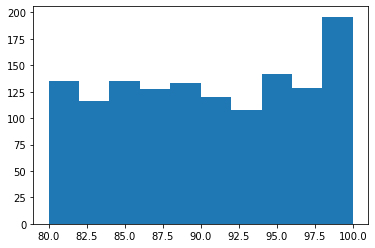

In [13]:
plt.hist(getListForHistogramAndBoxPlot(df,spark))
plt.show()

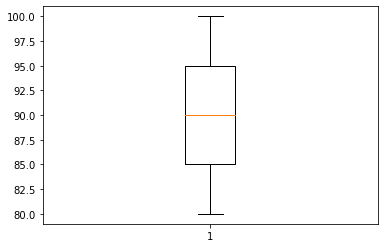

In [14]:
plt.boxplot(getListForHistogramAndBoxPlot(df,spark))
plt.show()

In [17]:
lists = getListsForRunChart(df,spark)

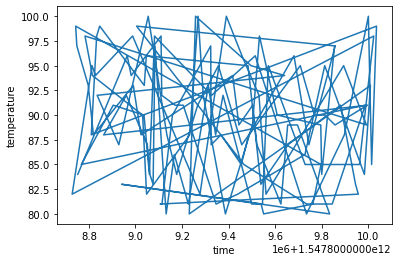

In [18]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

In [16]:
!rm -f rklib.py
!wget https://raw.githubusercontent.com/IBM/coursera/master/rklib.py

--2022-05-28 19:27:27--  https://raw.githubusercontent.com/IBM/coursera/master/rklib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2540 (2.5K) [text/plain]
Saving to: ‘rklib.py’

rklib.py            100%[===================>]   2.48K  --.-KB/s    in 0s      

2022-05-28 19:27:28 (30.2 MB/s) - ‘rklib.py’ saved [2540/2540]



In [ ]:
from rklib import submitAll
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = ###_YOUR_CODE_GOES_HERE_###
token = ###_YOUR_CODE_GOES_HERE_###

In [ ]:
parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot())))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot()))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart())))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart()[0]))

submitAll(email, token, key, parts_data)